#### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load datasets

In [3]:
features = pd.read_csv(r"Data\features.csv")
stores = pd.read_csv(r"Data\stores.csv")
train = pd.read_csv(r"Data\train.csv")
test = pd.read_csv(r"Data\test.csv")
print("features shape :", features.shape)
print("stores shape :", stores.shape)
print("train shape :", train.shape)
print("test shape :", test.shape)

features shape : (8190, 12)
stores shape : (45, 3)
train shape : (421570, 5)
test shape : (115064, 4)


In [4]:
pd.options.display.expand_frame_repr = False
pd.options.display.max_columns = None
pd.options.display.width = 2000
print(features.info())
features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
print(stores.info())
stores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
print(train.info())
train.head()
'''Weekly_Sales is the target variables.'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


'Weekly_Sales is the target variables.'

In [7]:
print(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB
None


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


#### Data Preparation

Let's merge features, stores and train datasets for more insights: "Store" is common in all the datasets.

In [8]:
min(train["Date"]), max(train["Date"]), min(features["Date"]), max(features["Date"])

('2010-02-05', '2012-10-26', '2010-02-05', '2013-07-26')

- Start date and End date in 'train' are 2010-02-05 and 2010-10-26 respectively, while Start Date in 'feature' is 2010-02-05 and End Date in 'feature' is 2013-07-26. Therefore, in merging 'train' and 'feature' on ['Store', 'Date', 'IsHoliday'] Sales data after '2012-10-26' would not be considered in merging.

In [9]:
merged_data = train.merge(features, how="left", on=["Store", "Date", "IsHoliday"])
merged_data = merged_data.merge(stores, how="left", on=["Store"])

In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


- Columns 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5' are just some Walmart's promotional data, and not related to our analysis.

In [11]:
merged_data.drop(columns=["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"], inplace=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   CPI           421570 non-null  float64
 8   Unemployment  421570 non-null  float64
 9   Type          421570 non-null  object 
 10  Size          421570 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 32.6+ MB


In [12]:
merged_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


#### EDA

##### Descriptive analysis

In [13]:
merged_data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,227.232807,14.313000,219622.000000


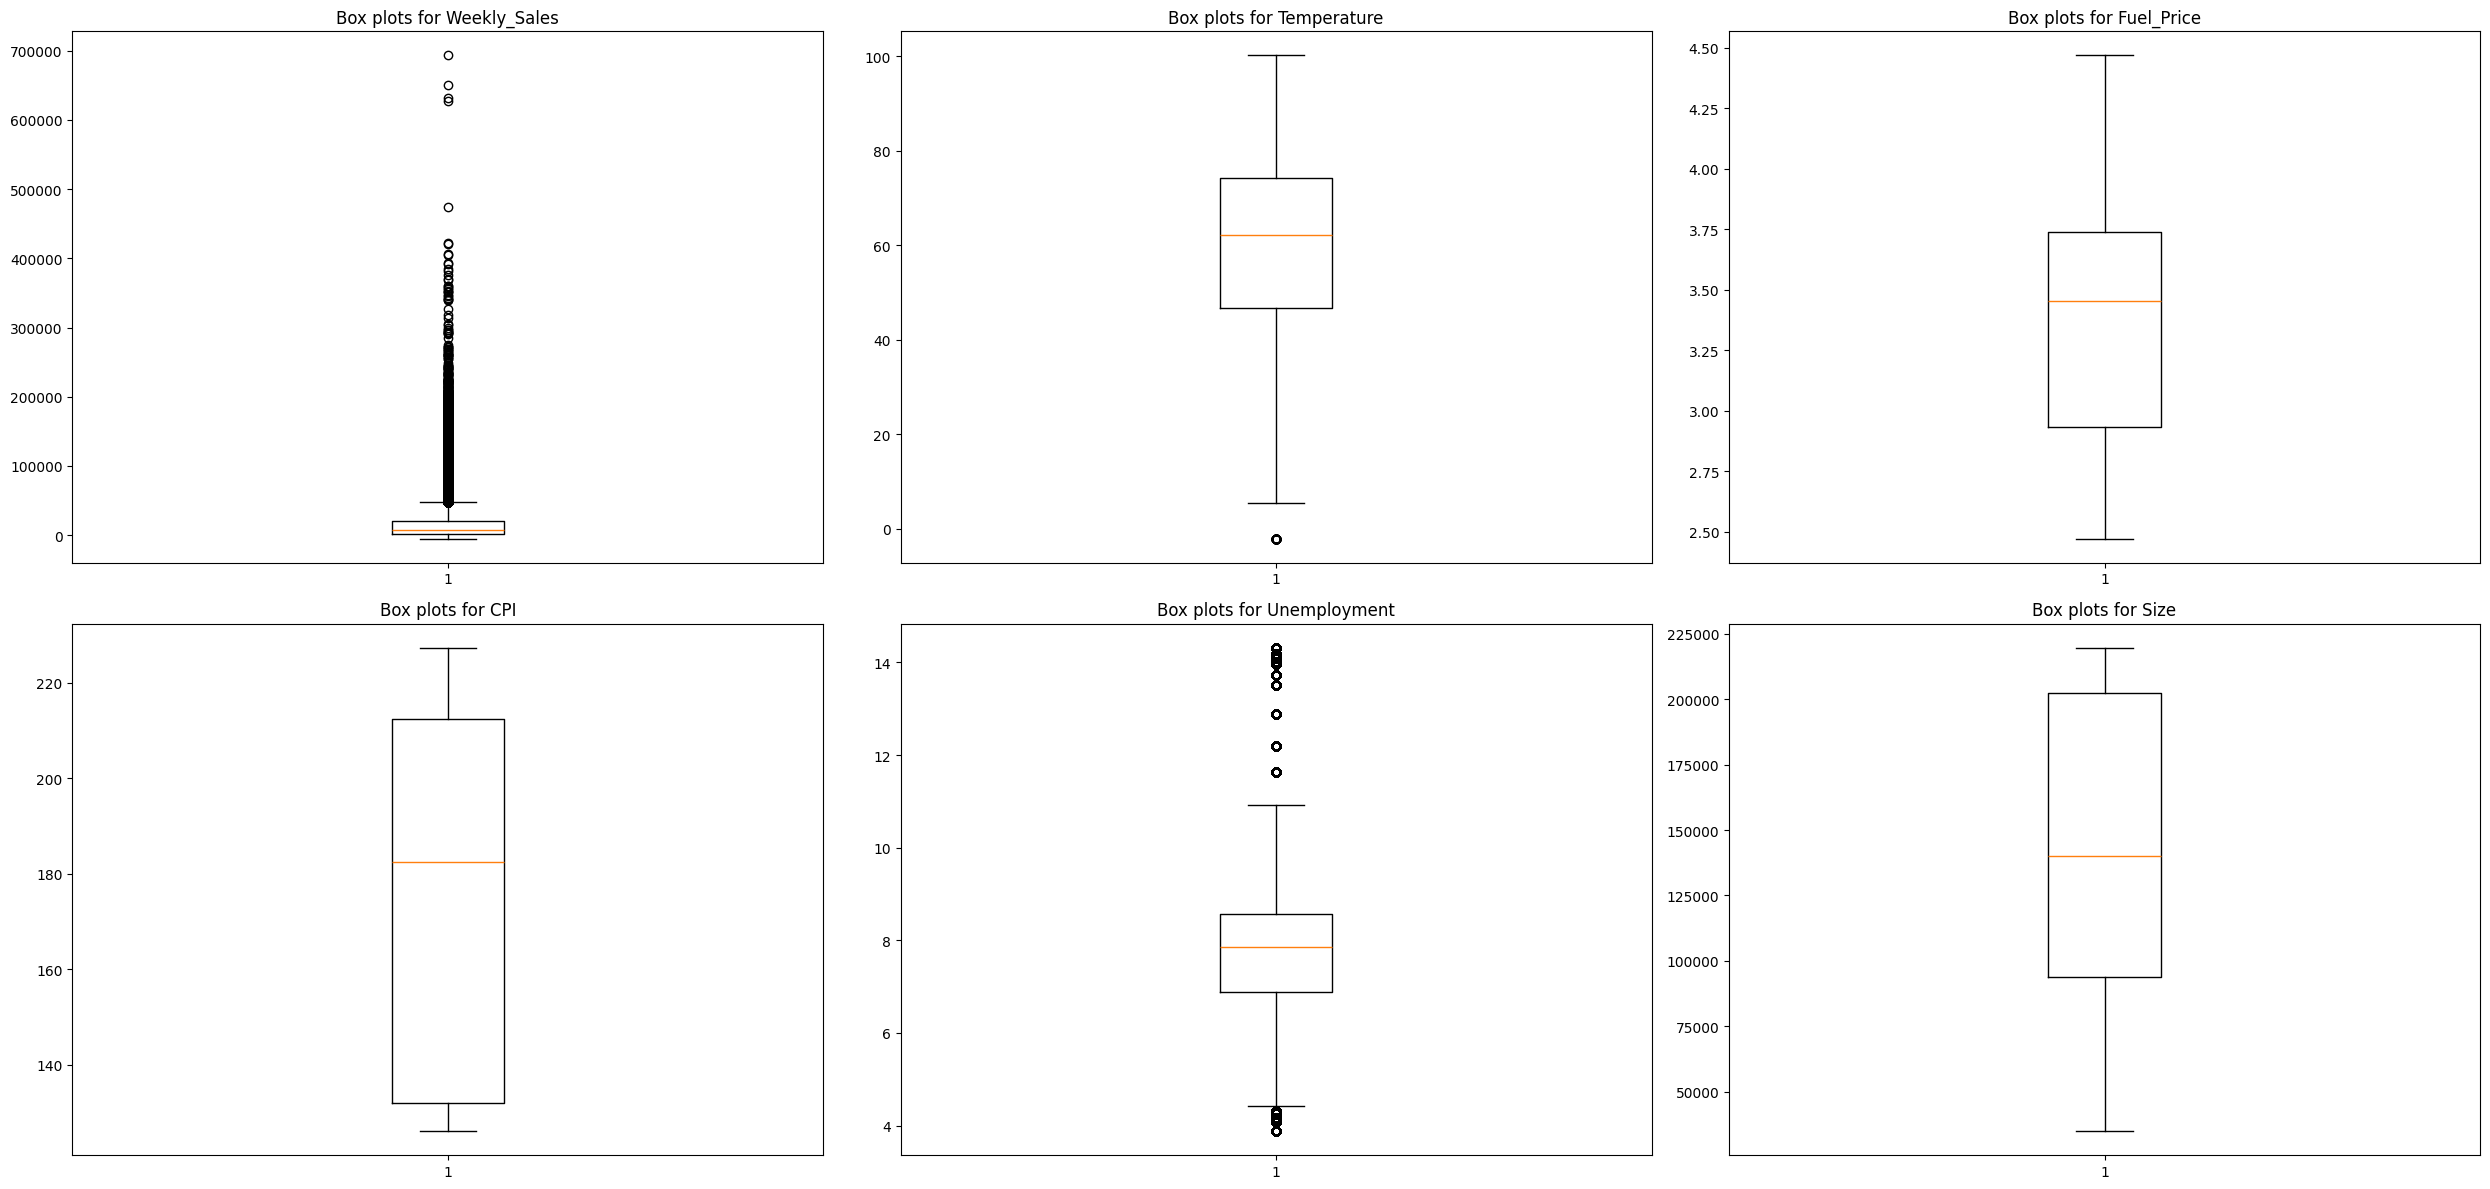

In [14]:
columns_boxplots = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment", "Size"]
fig, axes= plt.subplots(int(np.ceil(len(columns_boxplots)/3)), 3, figsize=(25,12))
axes = axes.flatten()
for i, column_boxplot in enumerate(columns_boxplots):
    axes[i].boxplot(merged_data[column_boxplot])
    axes[i].set_title(f"Box plots for {column_boxplot}")
plt.tight_layout()
plt.show()

##### Correlation heatmap

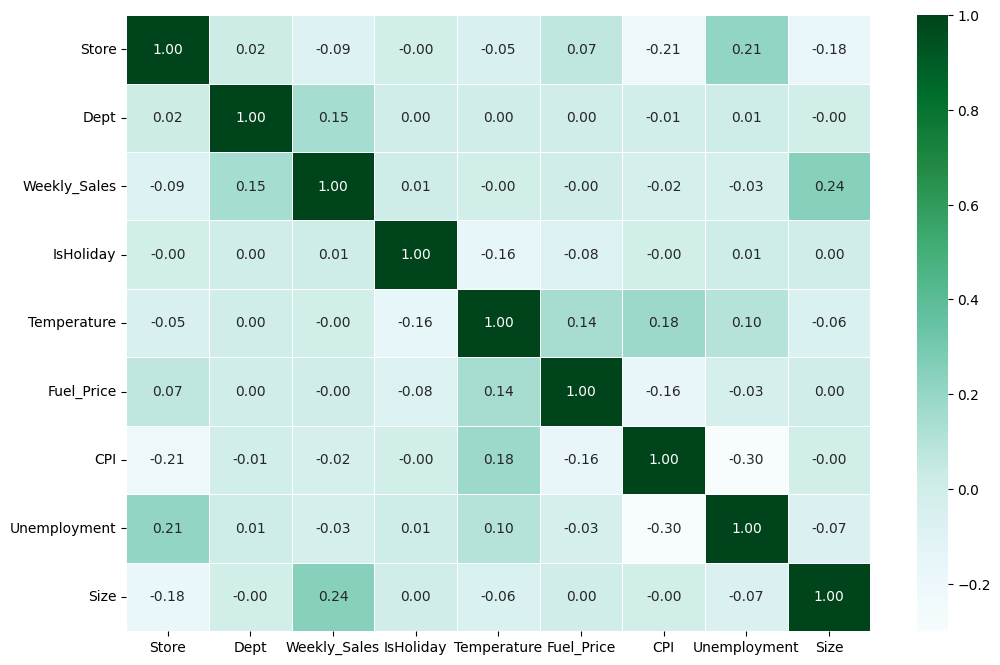

In [15]:
correlation_data = merged_data.drop(columns=["Date", "Type", ])
corr_matrix = correlation_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="BuGn", annot=True, fmt=".2f", linewidths=0.5)

plt.show()

- Temperature' and 'Year' have very less effect on Weekly Sales.
- 'Store Size' and 'Dept' influence Weekly Sales the most.

##### Year-wise sales analysis

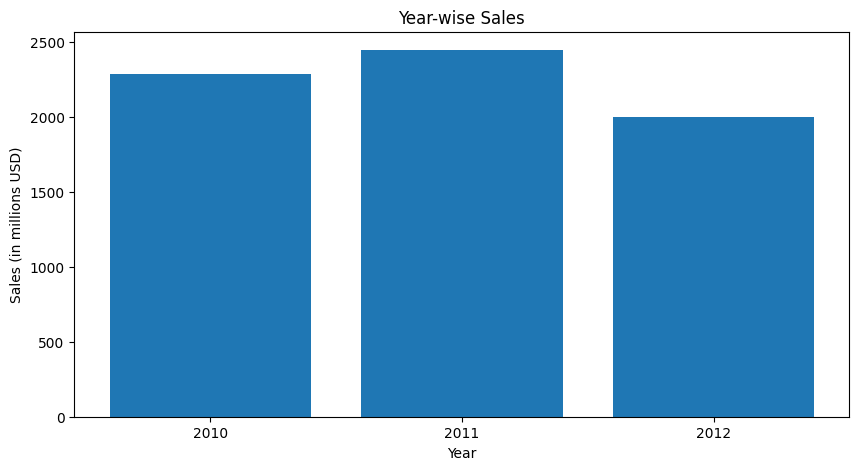

In [16]:
merged_data["Year"] = pd.to_datetime(merged_data["Date"]).dt.year
yearly_sales = merged_data.groupby("Year")["Weekly_Sales"].sum().reset_index()
yearly_sales["Weekly_Sales"] = yearly_sales["Weekly_Sales"] / 1000000
plt.figure(figsize=(10,5))
plt.bar(yearly_sales["Year"], yearly_sales["Weekly_Sales"])
plt.xticks(yearly_sales["Year"])
plt.xlabel("Year")
plt.ylabel("Sales (in millions USD)")
plt.title("Year-wise Sales")
plt.show()

##### Each store sales in each year

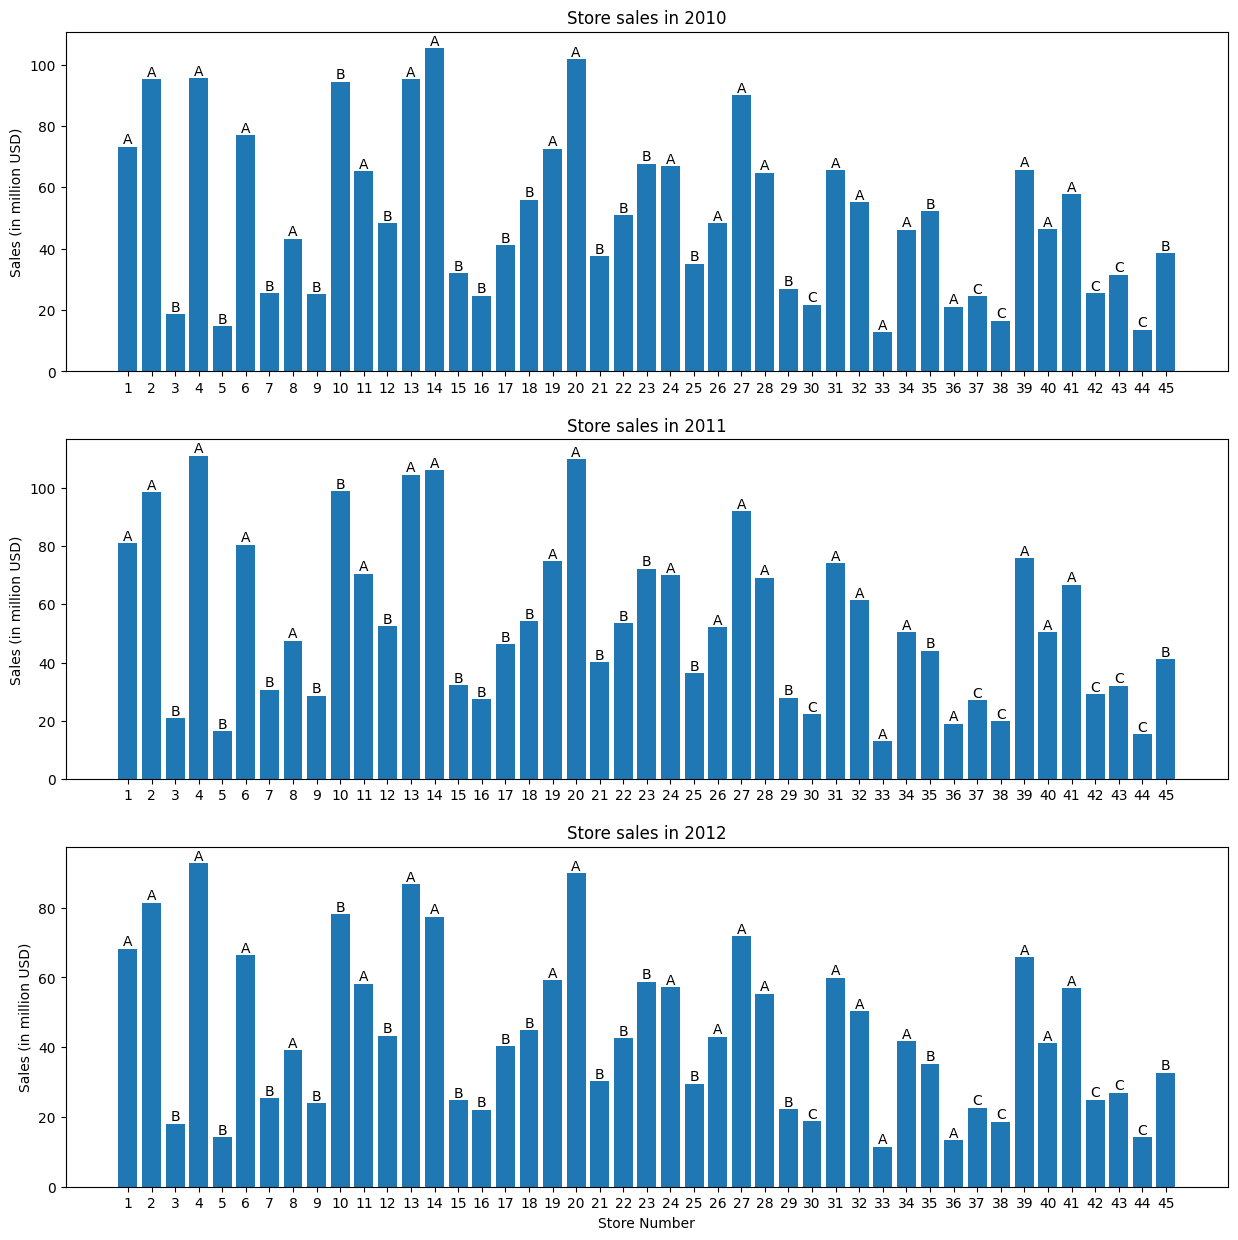

In [17]:
stores_type = merged_data[["Store", "Type"]].drop_duplicates()

stores_sales_in_2010 = merged_data[merged_data["Year"]==2010].groupby("Store")["Weekly_Sales"].sum().reset_index().merge(stores_type, how="left", on="Store")
stores_sales_in_2010["Weekly_Sales"] = stores_sales_in_2010["Weekly_Sales"] / 1000000

stores_sales_in_2011 = merged_data[merged_data["Year"]==2011].groupby("Store")["Weekly_Sales"].sum().reset_index().merge(stores_type, how="left", on="Store")
stores_sales_in_2011["Weekly_Sales"] = stores_sales_in_2011["Weekly_Sales"] / 1000000

stores_sales_in_2012 = merged_data[merged_data["Year"]==2012].groupby("Store")["Weekly_Sales"].sum().reset_index().merge(stores_type, how="left", on="Store")
stores_sales_in_2012["Weekly_Sales"] = stores_sales_in_2012["Weekly_Sales"] / 1000000


plt.figure(figsize=((15,15)))
plt.subplot(3, 1, 1)
bars = plt.bar(stores_sales_in_2010["Store"], stores_sales_in_2010["Weekly_Sales"])
plt.xticks(stores_sales_in_2010["Store"])
plt.ylabel("Sales (in million USD)")
plt.title("Store sales in 2010")
for bar, store_type in zip(bars, stores_sales_in_2010["Type"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), store_type, ha='center', va='bottom', fontsize=10)

plt.subplot(3, 1, 2)
bars = plt.bar(stores_sales_in_2011["Store"], stores_sales_in_2011["Weekly_Sales"])
plt.xticks(stores_sales_in_2011["Store"])
plt.ylabel("Sales (in million USD)")
plt.title("Store sales in 2011")
for bar, store_type in zip(bars, stores_sales_in_2011["Type"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), store_type, ha='center', va='bottom', fontsize=10)

plt.subplot(3, 1, 3)
bars = plt.bar(stores_sales_in_2012["Store"], stores_sales_in_2012["Weekly_Sales"])
plt.xticks(stores_sales_in_2012["Store"])
plt.xlabel("Store Number")
plt.ylabel("Sales (in million USD)")
plt.title("Store sales in 2012")
for bar, store_type in zip(bars, stores_sales_in_2012["Type"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), store_type, ha='center', va='bottom', fontsize=10)

plt.show()

##### Weekly Sales throghout each year

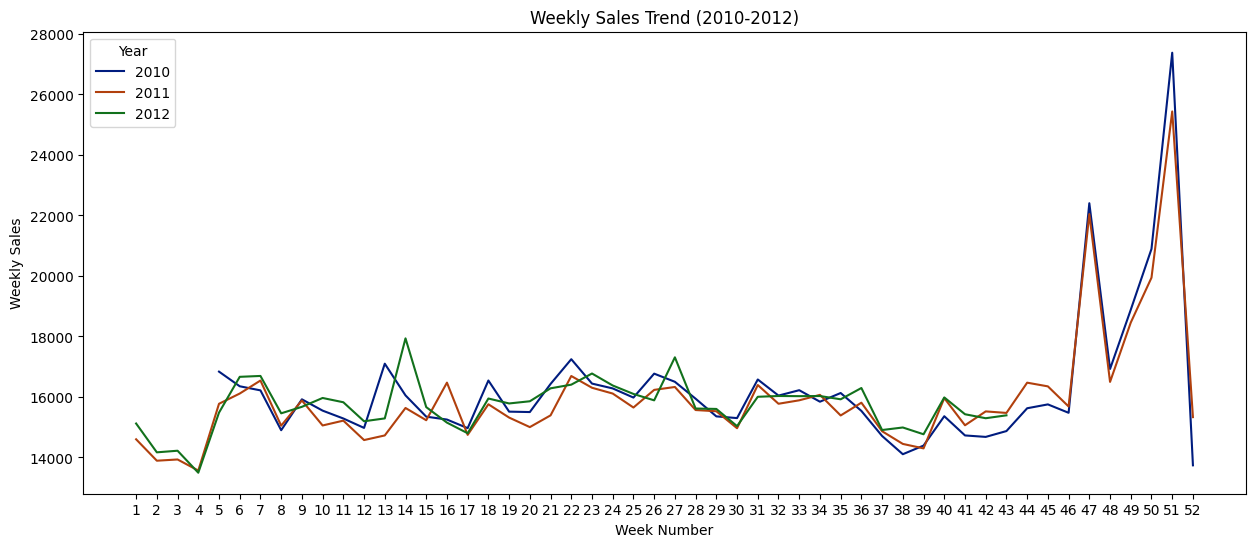

In [18]:
merged_data["Week"] = pd.to_datetime(merged_data["Date"]).dt.isocalendar().week
weekly_sales_data = merged_data[["Year", "Week", "Weekly_Sales"]]

plt.figure(figsize=(15, 6))
sns.lineplot(data=weekly_sales_data, x="Week", y="Weekly_Sales", hue="Year", palette="dark", errorbar=None)
plt.xticks(range(1, 53))
plt.xlabel("Week Number")
plt.ylabel("Weekly Sales")
plt.title("Weekly Sales Trend (2010-2012)")
plt.legend(title="Year")
plt.show()

- Weekly sales increase during holidays like Thanksgiving and Christmas each year.
- NOTE: For year 2012, data is available only till 43th week.

##### Holiday effect on Weekly Sales

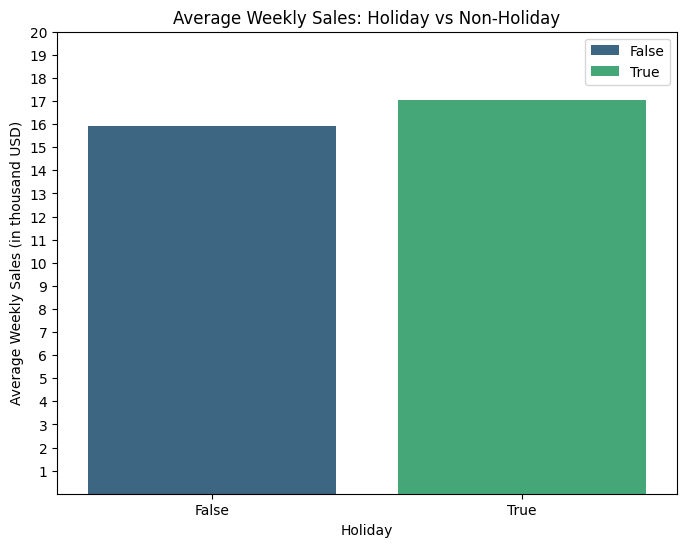

In [19]:
holiday_sales = merged_data.groupby("IsHoliday")["Weekly_Sales"].mean().reset_index()
holiday_sales["Weekly_Sales"] = holiday_sales["Weekly_Sales"] / 1000
plt.figure(figsize=(8,6))
sns.barplot(data=holiday_sales, x="IsHoliday", y="Weekly_Sales", palette="viridis", hue=holiday_sales["IsHoliday"].unique())
plt.yticks(range(1,21))
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.xlabel("Holiday")
plt.ylabel("Average Weekly Sales (in thousand USD)")
plt.show()

##### Fuel Price, CPI and Unemployment effect on Weekly Sales

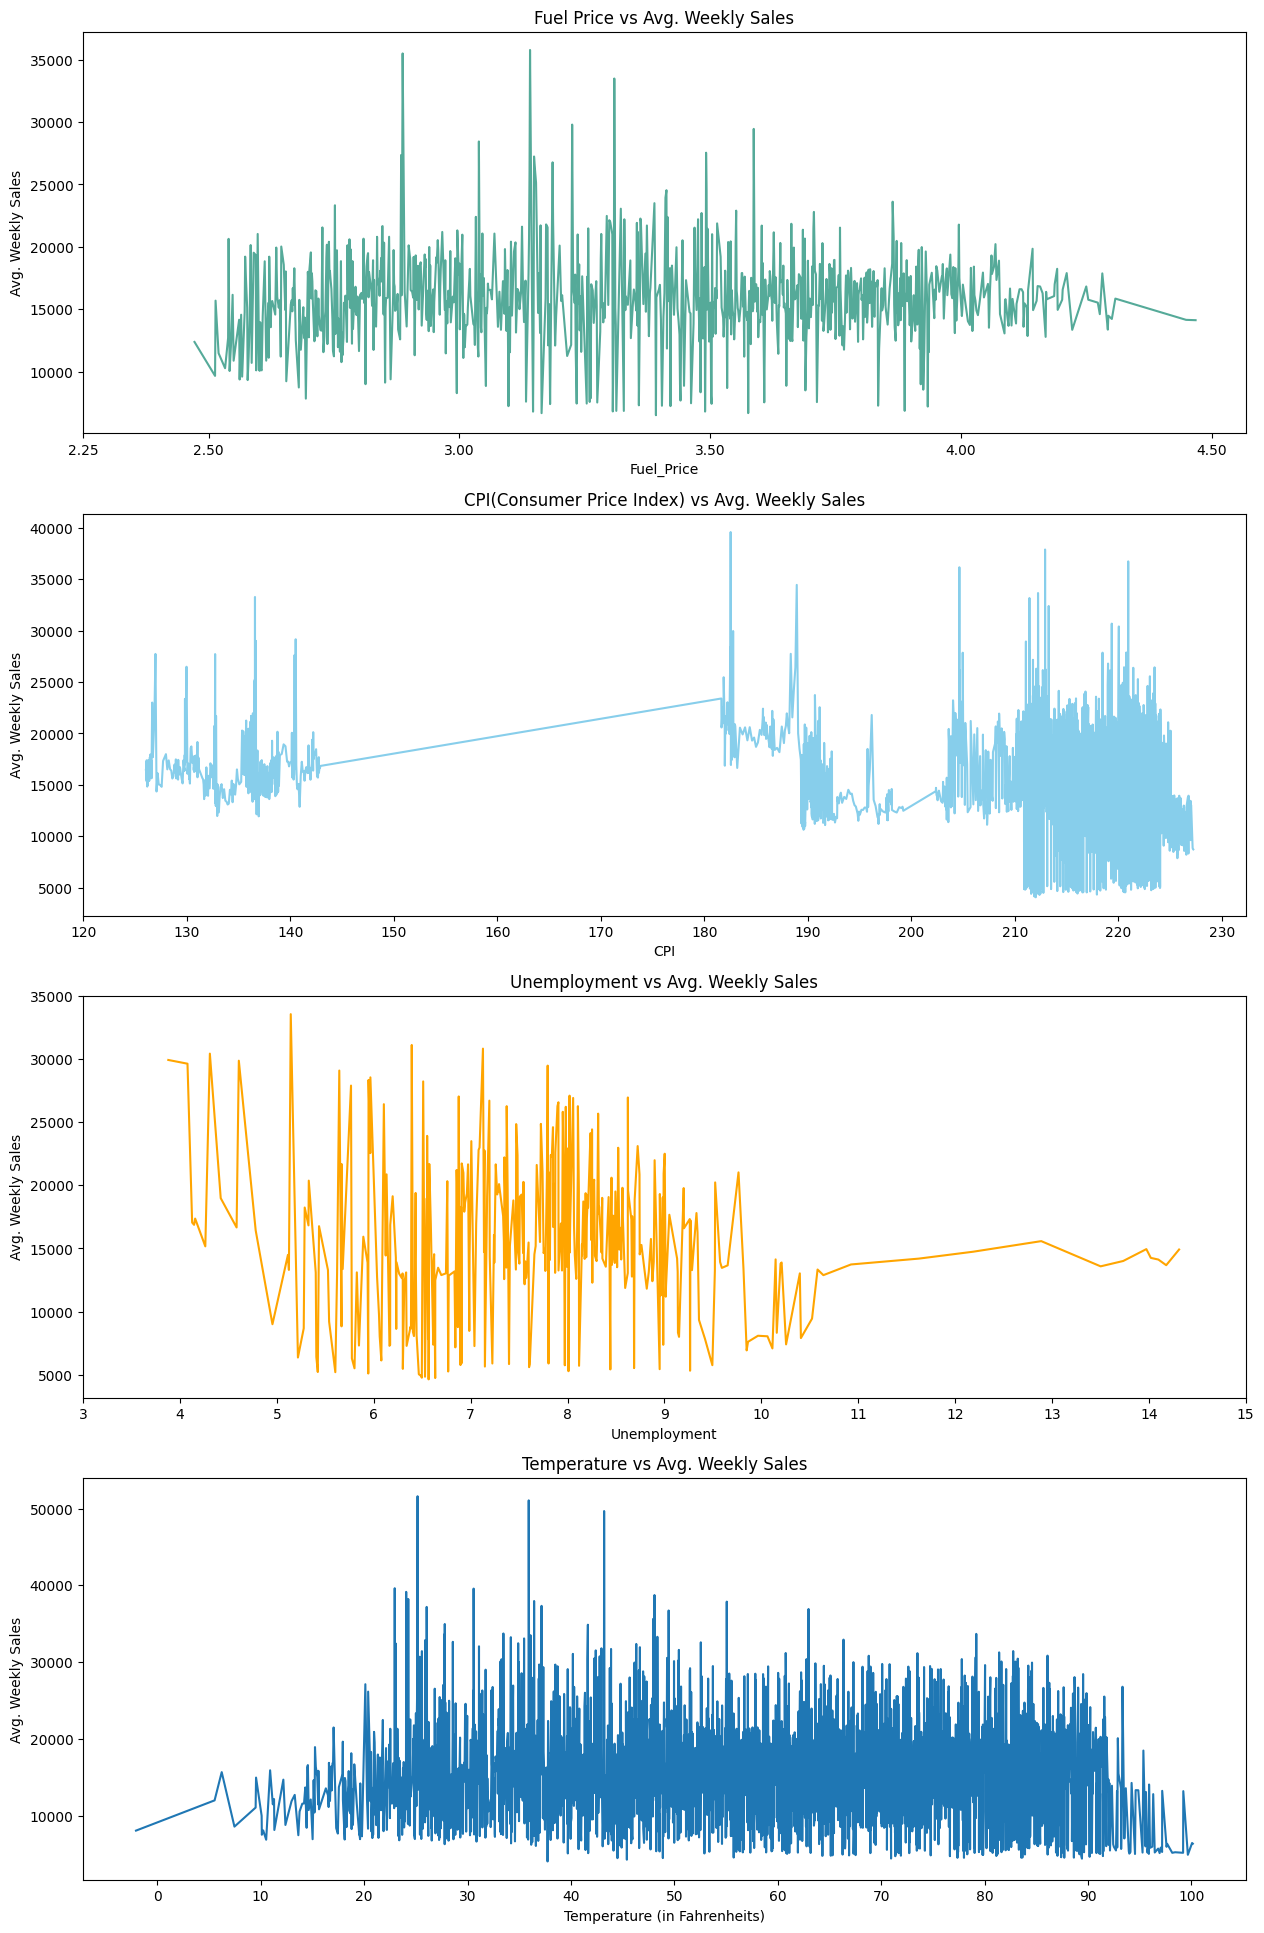

In [20]:
plt.figure(figsize=(15, 24))
plt.subplot(4, 1, 1)
fuel_price_data = merged_data.groupby("Fuel_Price")["Weekly_Sales"].mean().reset_index()
sns.lineplot(data=fuel_price_data, x="Fuel_Price", y="Weekly_Sales", errorbar=None, color="#5A9")
plt.xticks([2.25, 2.5, 3.0, 3.5, 4.0, 4.5])
plt.ylabel("Avg. Weekly Sales")
plt.title("Fuel Price vs Avg. Weekly Sales")

CPI_data = merged_data.groupby("CPI")["Weekly_Sales"].mean().reset_index()
plt.subplot(4, 1, 2)
sns.lineplot(data=CPI_data, x="CPI", y="Weekly_Sales", errorbar=None, color="skyblue")
plt.xticks(range(120, 231, 10))
plt.ylabel("Avg. Weekly Sales")
plt.title("CPI(Consumer Price Index) vs Avg. Weekly Sales")

Unemployment_data = merged_data.groupby("Unemployment")["Weekly_Sales"].mean().reset_index()
plt.subplot(4, 1, 3)
sns.lineplot(data=Unemployment_data, x="Unemployment", y="Weekly_Sales", errorbar=None, color="orange")
plt.xticks(range(3, 16))
plt.ylabel("Avg. Weekly Sales")
plt.title("Unemployment vs Avg. Weekly Sales")


Temperature_data = merged_data.groupby("Temperature")["Weekly_Sales"].mean().reset_index()
plt.subplot(4, 1, 4)
sns.lineplot(data=Temperature_data, x="Temperature", y="Weekly_Sales", errorbar=None)
plt.xlabel("Temperature (in Fahrenheits)")
plt.xticks(range(0, 101, 10))
plt.ylabel("Avg. Weekly Sales")
plt.title("Temperature vs Avg. Weekly Sales")

plt.show()

- Afer Fuel Price went above 4 there is a visible decrease in Weekly Sales.
- For CPI > 200, Weekly Sales increased.
- When Unemployment went above 10.5, Weekly Sales droped.
- Slight fall in Weekly Sales data when temperature is too low(<15) or too high(>95).